Saving StressLevelDataset.csv to StressLevelDataset (2).csv
Shape of dataset: (1100, 21)
Columns: Index(['anxiety_level', 'self_esteem', 'mental_health_history', 'depression',
       'headache', 'blood_pressure', 'sleep_quality', 'breathing_problem',
       'noise_level', 'living_conditions', 'safety', 'basic_needs',
       'academic_performance', 'study_load', 'teacher_student_relationship',
       'future_career_concerns', 'social_support', 'peer_pressure',
       'extracurricular_activities', 'bullying', 'stress_level'],
      dtype='object')
   anxiety_level  self_esteem  mental_health_history  depression  headache  \
0             14           20                      0          11         2   
1             15            8                      1          15         5   
2             12           18                      1          14         2   
3             16           12                      1          15         4   
4             16           28                      0      

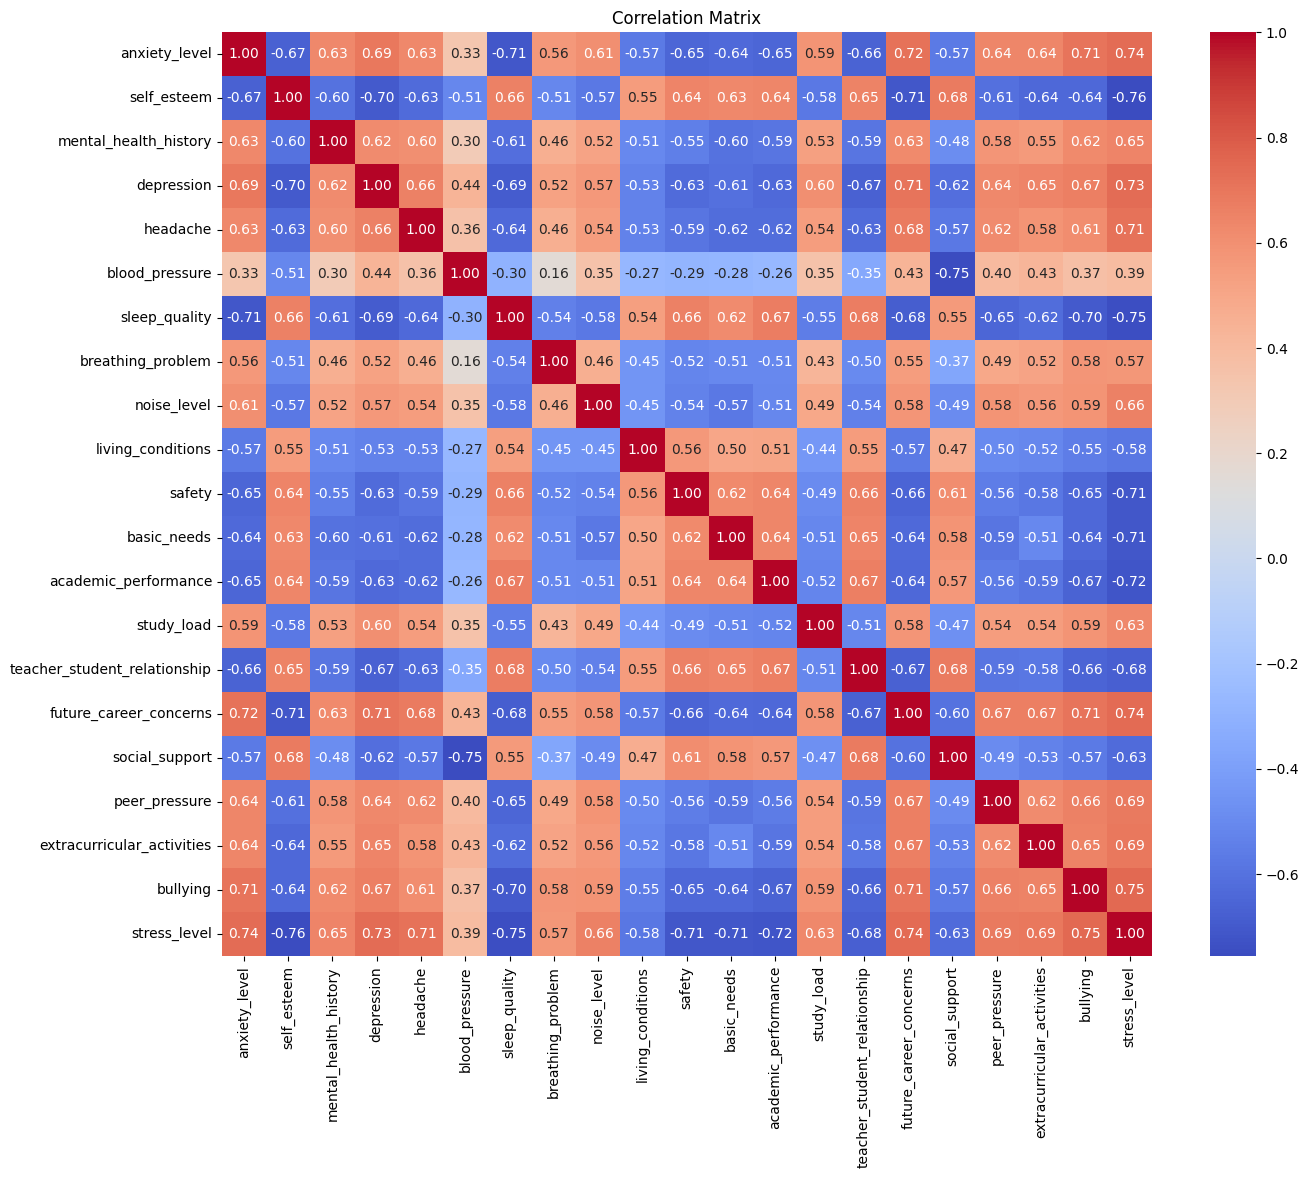

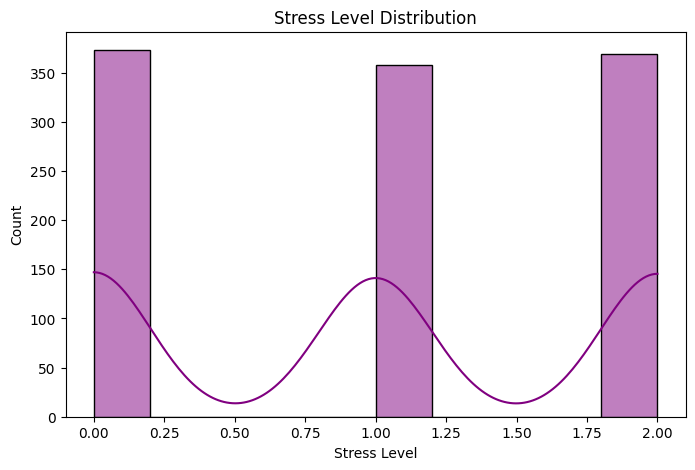

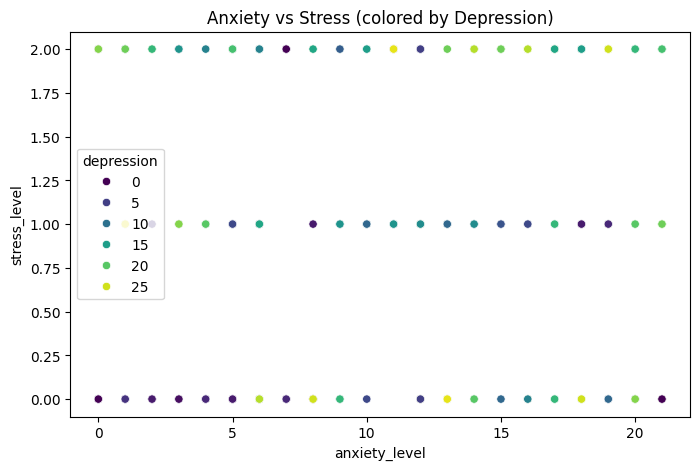

Cleaned dataset saved!


In [6]:
# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the dataset
# Upload the CSV file in Colab and use this
from google.colab import files
uploaded = files.upload()

# Assuming the file is named 'mental_health.csv'
df = pd.read_csv(next(iter(uploaded.keys())))

# Step 3: Quick look at data
print("Shape of dataset:", df.shape)
print("Columns:", df.columns)
print(df.head())

# Step 4: Basic statistics
print("\nSummary statistics:")
print(df.describe())

# Step 5: Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Step 6: Correlation matrix (to see relationships)
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Step 7: Plot stress level distribution
plt.figure(figsize=(8,5))
sns.histplot(df['stress_level'], bins=10, kde=True, color='purple')
plt.title("Stress Level Distribution")
plt.xlabel("Stress Level")
plt.ylabel("Count")
plt.show()

# Step 8: Example scatter plot: Anxiety vs Stress
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='anxiety_level', y='stress_level', hue='depression', palette='viridis')
plt.title("Anxiety vs Stress (colored by Depression)")
plt.show()

# Step 9: Optional: Save cleaned dataset
df.to_csv("mental_health_cleaned.csv", index=False)
print("Cleaned dataset saved!")

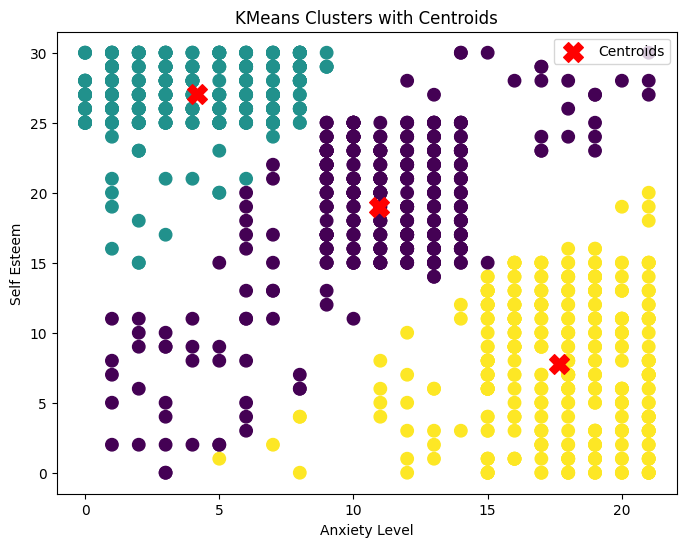

In [9]:
# Import necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Example: assuming df already exists with 'anxiety_level' and 'self_esteem' columns
X = df[['anxiety_level', 'self_esteem']]  # select features for clustering

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Plot the clusters
plt.figure(figsize=(8,6))
plt.scatter(df['anxiety_level'], df['self_esteem'], c=df['cluster'], cmap='viridis', s=80)
plt.scatter(
    kmeans.cluster_centers_[:, 0] * scaler.scale_[0] + scaler.mean_[0],  # x-coordinates of centroids
    kmeans.cluster_centers_[:, 1] * scaler.scale_[1] + scaler.mean_[1],  # y-coordinates of centroids
    s=200, c='red', marker='X', label='Centroids'
)
plt.xlabel("Anxiety Level")
plt.ylabel("Self Esteem")
plt.title("KMeans Clusters with Centroids")
plt.legend()
plt.show()


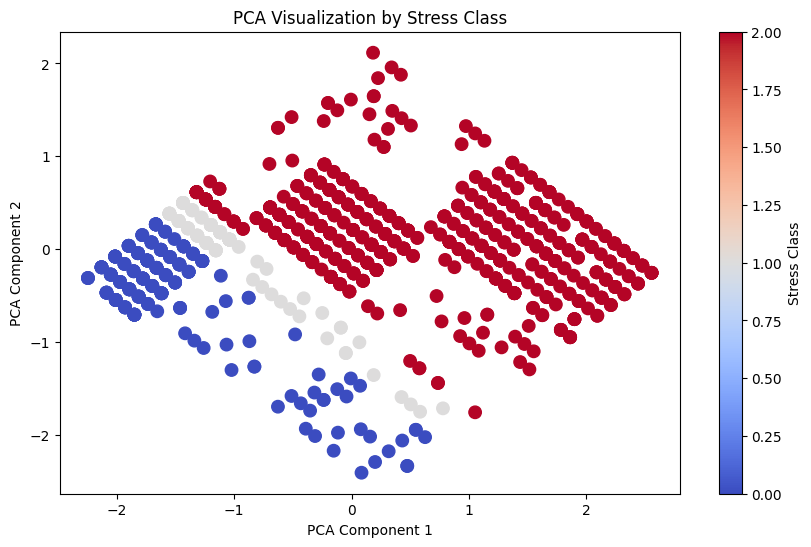

In [14]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Example DataFrame (replace this with your actual df)
# df = pd.read_csv("your_dataset.csv")

# Let's assume df has 'anxiety_level' and 'self_esteem' columns
X = df[['anxiety_level', 'self_esteem']]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create 'stress_class' as a simple example:
# Low stress: anxiety_level < 5
# Medium stress: 5 <= anxiety_level < 7
# High stress: anxiety_level >= 7
df['stress_class'] = pd.cut(
    df['anxiety_level'],
    bins=[-np.inf, 5, 7, np.inf],
    labels=['Low', 'Medium', 'High']
)

# PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled)

# Plot
plt.figure(figsize=(10,6))
plt.scatter(
    pca_components[:,0],
    pca_components[:,1],
    c=pd.Categorical(df['stress_class']).codes,  # categorical coloring
    cmap='coolwarm',
    s=80
)
plt.colorbar(label='Stress Class')
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("PCA Visualization by Stress Class")
plt.show()


In [16]:
import plotly.express as px  # Import Plotly Express

fig = px.scatter(
    df,                        # Your DataFrame
    x='anxiety_level',         # x-axis
    y='self_esteem',           # y-axis
    color='stress_class',      # color by stress class
    size='sleep_quality',      # size of points
    hover_data=df.columns,     # show all columns on hover
    title="Stress Interactive Scatter"
)
fig.show()                     # Display interactive plot